
###  Clustering Analysis on a Customers Dataset
Consider that you possess a dataset of customer information, and your task is to perform customer segmentation on this historical data. Customer segmentation involves dividing a customer base into distinct groups based on shared characteristics. This approach is crucial because it allows a business to target specific groups effectively and optimize the allocation of marketing resources. For instance, one segment might consist of high-profit, low-risk customers—those more likely to make purchases or subscribe to services, whom the business aims to retain. Another segment could be customers from non-profit organizations, among others.

In this assignment, you will perform clustering analysis on the Mall Customers Dataset. This dataset includes the `Age`, `Annual Income`, and `Spending Score` of customers. You will use K-Means and DBSCAN clustering algorithms to segment customers based on their behaviors and traits. The primary objective is to understand customer segments to tailor marketing strategies effectively.

---

#### Step 1: Data Loading and Initial Exploration

**Exercise 1:**
- Load the Mall Customers dataset from the following URL: 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'.
- Use pandas to read the data and display the first few rows. 
- Generate basic statistics of the data using `.describe()`.


In [2]:
import pandas as pd
import io
import requests

# Load the data
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'

s = requests.get(url).content
mall_customers = pd.read_csv(io.StringIO(s.decode('utf-8')))
mall_customers.head(3)
# Write your code here


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9


In [3]:
mall_customers.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


#### Step 2: Data Preprocessing

**Exercise 2:**
- As observed, the "Address" field in this dataset is a categorical variable. The k-means algorithm, which relies on Euclidean distance, isn't suitable for categorical data because this type of distance measure doesn't make sense for discrete variables. Therefore, exclude this feature and proceed with the clustering analysis.
- Now  normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.





In [4]:
#checking for nan values in the dataframe 
df_copy = mall_customers.copy()
df_copy.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [5]:
#150 nan values in defaulted column so dropping those rows 
df_cleaned = df_copy.dropna()
df_cleaned.isnull().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64

In [6]:
df_cleaned.shape #checking the shape of cleaned dataset


(700, 10)

In [7]:
df_cleaned = df_cleaned.drop(["Customer Id","Address","Defaulted"],axis = 1) #dropping unnecessary columns which are not required for clustering analysis
df_cleaned.head(3)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9


In [8]:
from sklearn.preprocessing import StandardScaler
# Write your code here
scaler = StandardScaler().fit(df_cleaned)
data_scaled = scaler.transform(df_cleaned)
data_scaled = pd.DataFrame(data_scaled,columns = df_cleaned.columns)
data_scaled.head(3)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.580528
1,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,0.372222
2,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.559495


#### Step 3: Applying K-Means Clustering

**Exercise 3:**
- Apply K-Means clustering on the processed data. Choose a suitable number of clusters (start with `k=3`).
- Fit the model and then predict the cluster labels.
- Add these labels as a new column in the DataFrame and create a new DataFrame.
- Calculate the centroid value of each class.



In [9]:
from sklearn.cluster import KMeans
k_means_obj = KMeans(n_clusters=3,random_state=0)
k_means_obj.fit(data_scaled)
kmeans_labels = k_means_obj.labels_
df_cleaned["kmeans_cluster"] = kmeans_labels
new_df = df_cleaned.copy()
# Write your code here
centriod_values = k_means_obj.cluster_centers_
centriod_values

c:\Users\dell xps\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([[ 1.02270252,  0.25424236,  1.27940701,  1.39086866,  1.3244869 ,
         1.49072794,  0.63121467],
       [-0.64500537,  0.3180448 , -0.72067015, -0.46134611, -0.09473198,
        -0.04678834,  0.66334706],
       [ 0.05840619, -0.28733904,  0.01865315, -0.18296783, -0.39167029,
        -0.47858449, -0.63370906]])


new_df is a copy of df_cleaned. In the df_cleaned dataframe ,the kmeans cluster labels are added to a column called "kmeans_cluster". The new_df  is used for plotting .

**Exercise 4:**
- Plot the results using a scatter plot. Use `Age` as the x-axis and `Income` as the y-axis. Color the points based on the cluster labels.
- Interpret the plot. What does each cluster seem to represent in terms of customer behavior?


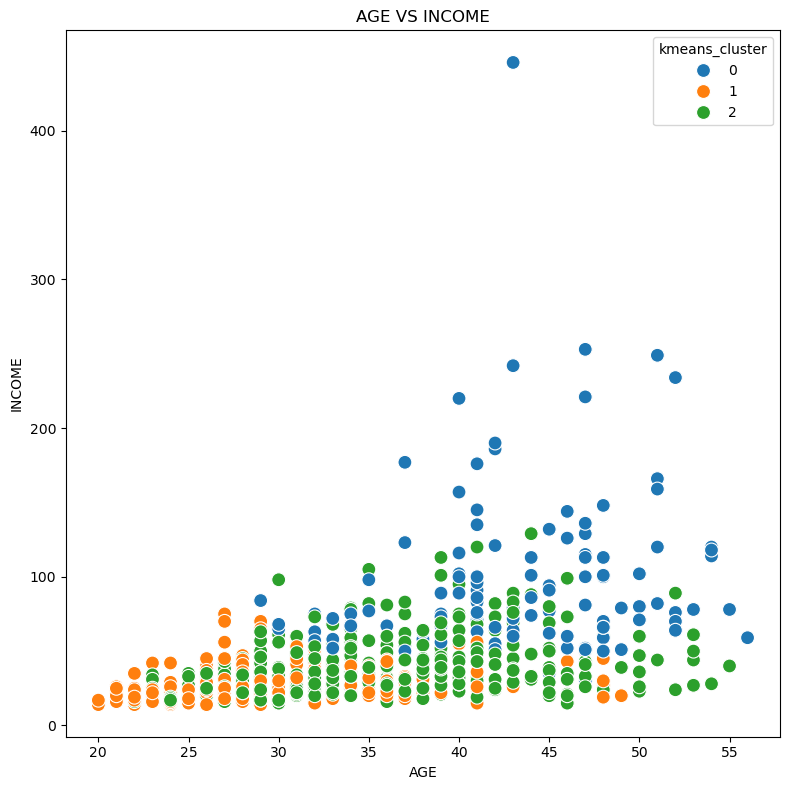

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Write your code here
plt.figure(figsize=(8,8))
c_palette = ["#1f77b4", "#ff7f0e", "#2ca02c"]
sns.scatterplot(new_df,x = "Age", y ="Income",hue="kmeans_cluster",s = 100,palette=c_palette)
plt.xlabel("AGE")
plt.ylabel("INCOME")
plt.title("AGE VS INCOME")
plt.tight_layout()
plt.show()


From the above plot there are three different clusters.
The cluster 0 is represented by green points. These people are from different age groups spreading from 30 to 55.They seems to have a low to medium income. Very few people in ths cluster have high income.

The cluster 1 is represented by orange points .It indicates that most of the people in this cluster1 has low income and seems to be younger individuals as many fall in the age group from 20 to 30. The people in this cluster has low income irrespective of their age

The cluster 2 is represented by blue points. Most of the people here are having higher incomes. most of the people here fall in the age group of (40 to 55)

While comparing age vs income generally - there is no exact linear pattern. But here as the age increases most of time the income is also increasing.. as we can clearly see the older people seems to have higher income.  There are many other factors to be considered as well while drawing conclusions.

In [11]:
#To know how many datapoints are present in each cluster formed by kmeans
cluster_counts = new_df['kmeans_cluster'].value_counts().sort_index()
print("number of datapoints per cluster :\n",cluster_counts)

number of datapoints per cluster :
 kmeans_cluster
0    121
1    224
2    355
Name: count, dtype: int64


c:\Users\dell xps\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dell xps\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dell xps\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dell xps\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory le

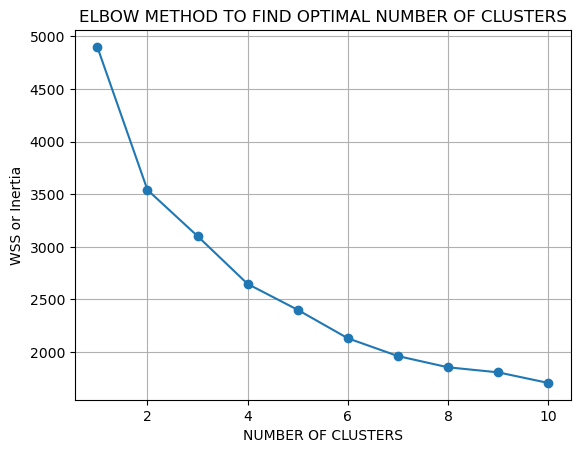

In [12]:
#using elbow method to idenfity optimal number of clusters for kmeans
inertia_values = []
range_of_clusters = range(1,11)
for j in range_of_clusters:
    kmeans_inst = KMeans(n_clusters=j,random_state=0)
    kmeans_inst.fit(data_scaled)
    inertia_values.append(kmeans_inst.inertia_)

plt.plot(range_of_clusters,inertia_values,marker= "o")
plt.title("ELBOW METHOD TO FIND OPTIMAL NUMBER OF CLUSTERS")
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel("WSS or Inertia")
plt.grid(True)
plt.show()

The above graph is used to find optimal number of k for k means clustering algorithm 

#### Step 4: Applying DBSCAN Clustering

**Exercise 5:**
- Apply DBSCAN to the same dataset. Start with `eps=0.5` and `min_samples=5`.
- Fit the model and then predict the cluster labels.
- Determine the count of predicted classes. Adjust 'eps' and 'min_samples' to attain a total of three classes.
- Add these labels as a new column in your DataFrame and create a new DataFrame.

In [13]:
from sklearn.cluster import DBSCAN
dbscan_obj = DBSCAN(eps = 1,min_samples=10)
dbscan_obj.fit(data_scaled)
dbscan_cluster_labels = dbscan_obj.labels_
cluster_count = len(set(dbscan_cluster_labels)) - (1 if -1 in dbscan_cluster_labels else 0)
print("Number of clusters formed are:",cluster_count)
df_cleaned["dbscan_cluster"] = dbscan_cluster_labels
temp_df = df_cleaned.copy()

cluster_counts = temp_df['dbscan_cluster'].value_counts().sort_index()
print("Number of datapoints per cluster :",cluster_counts)
# Write your code here

Number of clusters formed are: 3
Number of datapoints per cluster : dbscan_cluster
-1    267
 0    130
 1    283
 2     20
Name: count, dtype: int64


After trying different values for eps and min_samples, the value of eps as 1 and min_samples  as 10 gave me better clustering. 
temp_df is a new dataframe which is  copy of df_cleaned. 
a new column called dbscan_cluster has been added to df_cleaned which contains dbscan cluster labels in it. 
The newly created dataframe temp_df is used for plotting below.

**Exercise 6:**
- Plot the results using the same scatter plot setup as in Exercise 4.
- Compare the results with K-Means. How does DBSCAN differ in terms of cluster formation? 

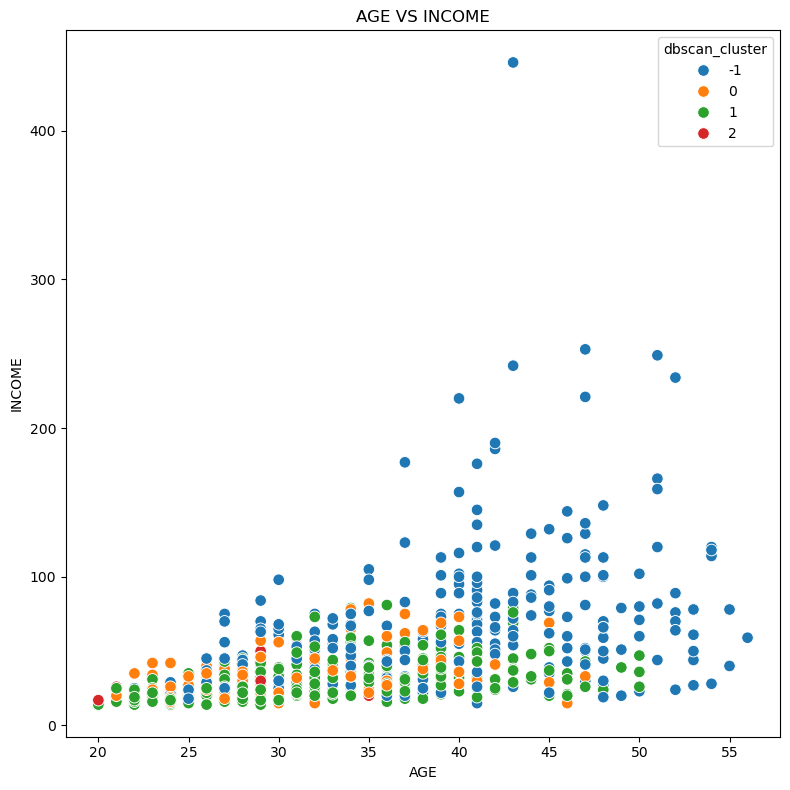

In [14]:
# Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Write your code here
plt.figure(figsize=(8,8))
c_palette = ["#1f77b4", "#ff7f0e", "#2ca02c","#d62728"]
sns.scatterplot(temp_df,x = "Age", y ="Income",hue="dbscan_cluster",s = 70 ,palette=c_palette)
plt.xlabel("AGE")
plt.ylabel("INCOME")
plt.title("AGE VS INCOME")
plt.tight_layout()
plt.show()


The dbscan clustering algorithm usually depends on two parameters for cluster formation.they are  eps and minpts parameter. It is clearly observed from above plot that the cluster are of irregular shapes and there is no proper distinction between clusters. From above graph, observations about the relation between age and income are not clear.The dbscan algorithm has also marked some points as noise which are indicated by blue color in the above graph. This shows that algorithm works effecitvely in identifying the outliers,where as in kmeans there is no such kind of noise consideration.It tries to fit everything into one of the clusters formed.

#### Step 5: Evaluation and Interpretation

**Exercise 7:**
- Calculate and compare the silhouette scores for both K-Means and DBSCAN.
- Discuss the strengths and weaknesses of each clustering method based on the dataset and the results obtained.

In [15]:
from sklearn.metrics import silhouette_score

Silhouette_coefficient_kmeans = silhouette_score(data_scaled, kmeans_labels, metric='euclidean')
filter = dbscan_cluster_labels!=-1
Silhouette_coefficient_dbscan = silhouette_score(data_scaled[filter], dbscan_cluster_labels[filter], metric='euclidean')
Silhouette_coefficient_withnoise_dbscan = silhouette_score(data_scaled, dbscan_cluster_labels, metric='euclidean')

print("kmeans clustering algorithm silhouette score :",Silhouette_coefficient_kmeans)
print("silhouette_score of dbscan algorithm with noise points",Silhouette_coefficient_withnoise_dbscan)

# Write your code here

kmeans clustering algorithm silhouette score : 0.18585300878298922
silhouette_score of dbscan algorithm with noise points 0.022163194277270242


k means strengths and weakness:

1)The clusters are more evenly distrubted,establishing distinct seperation between clusters.

2)The distinction between clusters  helped to make more understandings on data or relationship between features

3)The kmeans cluster also acheieved a higher silhouette score for this dataset. It means the clusters are better seperated.

4)The difficulty with k means clustering algorithm is finding the optimal k before hand. if wrong k is chosen it would effect the accuracy of the algorithm.

5)It classified all data points into one of the clusters. It can be senstive to outliers which would lead to inaccurate results.

dbscan strengths and weakness:


1)the dbscan algorithm is able to identify the noise points.It is effective in identifying the outliers. The noise points are represented as blue color points in the above plot.

2)There is no need to specify the number of clusters before hand for this algorithm

3)The choice of eps and min_sample is very important here as these paramaters are effecting the clustering results

4)It is also tricky to find optimal eps and minpts.

5)The silhouette score is also less when compared to kmeans algorithm. The formed clusters had no proper distinction between them to draw some corelation between features.

overall, the kmeans algorithm performed better than dbscan for this dataset. But both algorithm scores are not that great. 
